<a href="https://colab.research.google.com/github/mram3mr/SN-bootcamp-projects/blob/main/mram_omer_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the usual libraries for pandas and plotting. You can import sklearn later on
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#upload data
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [3]:
#Use pandas to read loan_data.csv as a dataframe called loans
loans = pd.read_csv('loan_data.csv')

In [4]:
#Check out the info()
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
#Check out the head()
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
#Check out the describe()
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Text(0.5, 0, 'FICO')

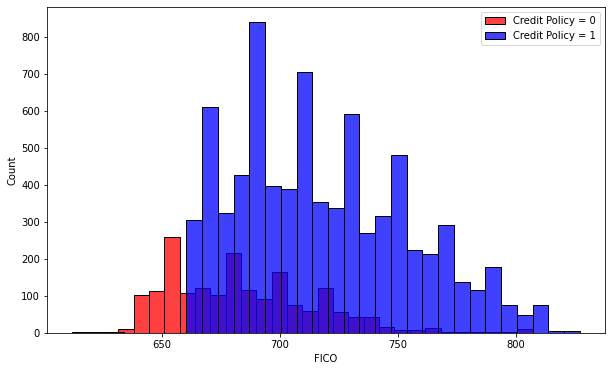

In [11]:
#Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome
plt.subplots(figsize = (10,6))
sns.histplot(loans[loans['credit.policy'] == 0]['fico'], bins = 30, kde = False, color = 'red', label = 'Credit Policy = 0')
sns.histplot(loans[loans['credit.policy'] == 1]['fico'], bins = 30, kde = False, color = 'blue', label = 'Credit Policy = 1')
plt.legend(loc = 0)
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

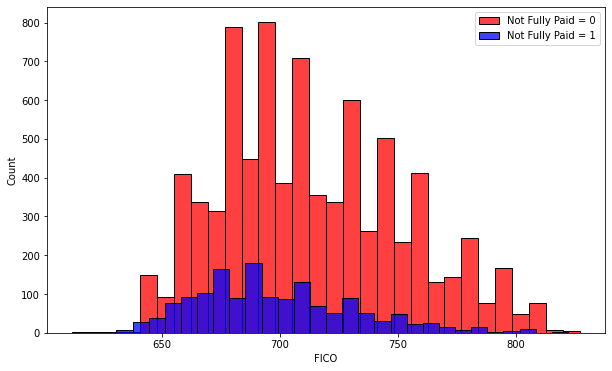

In [10]:
#Create a similar figure, except this time select by the not.fully.paid column
plt.subplots(figsize = (10,6))
sns.histplot(loans[loans['not.fully.paid'] == 0]['fico'], bins = 30, kde = False, color = 'red', label = 'Not Fully Paid = 0')
sns.histplot(loans[loans['not.fully.paid'] == 1]['fico'], bins = 30, kde = False, color = 'blue', label = 'Not Fully Paid = 1')
plt.legend(loc = 0)
plt.xlabel('FICO')

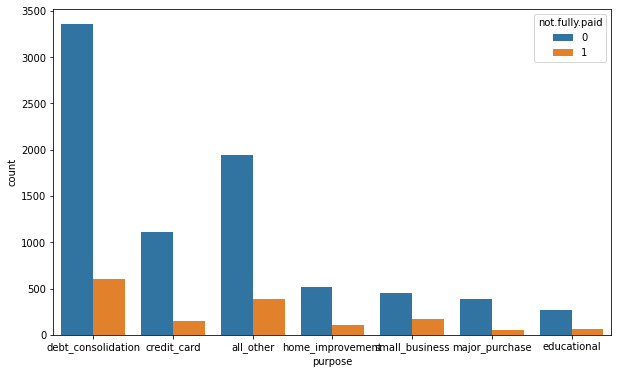

In [12]:
#Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid
plt.subplots(figsize = (10,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loans)

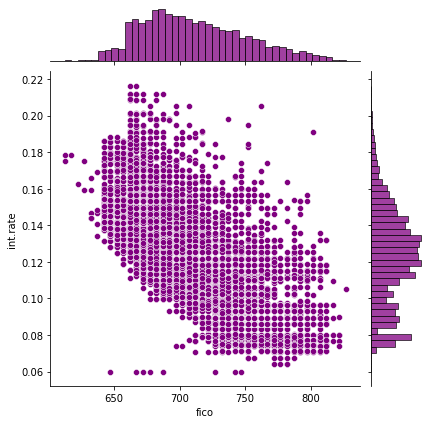

In [14]:
#Let's see the trend between FICO score and interest rate. Recreate the following jointplot.
sns.jointplot(x = 'fico', y = 'int.rate', data = loans , color='purple')

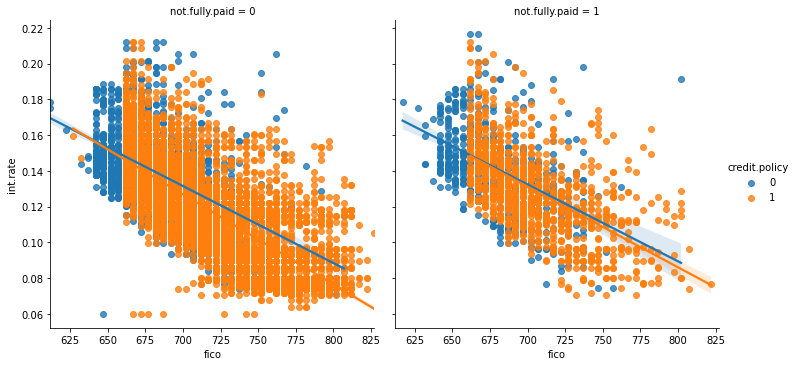

In [15]:
#Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns
sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', data = loans)

In [16]:
#Check loans.info() again
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [22]:
#Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.
cat_feats =['purpose']
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first = True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [24]:
#Use sklearn to split your data into a training set and a testing set as we've done in the past
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state= 0)

In [25]:
#Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
#Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
#Create predictions from the test set and create a classification report and a confusion matrix
y_predict = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1615
           1       0.18      0.22      0.20       301

    accuracy                           0.73      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.74      0.73      0.74      1916

[[1328  287]
 [ 236   65]]


In [32]:
#Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 500)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
#Predict the class of not.fully.paid for the X_test data
y_predict = random_forest.predict(X_test)

In [34]:
#Now create a classification report from the results.  
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1615
           1       0.50      0.03      0.06       301

    accuracy                           0.84      1916
   macro avg       0.67      0.51      0.49      1916
weighted avg       0.79      0.84      0.78      1916



In [ ]:
#Do you get anything strange or some sort of warning? 
#their is a kind of bais ...

In [35]:
#Show the Confusion Matrix for the predictions
print(confusion_matrix(y_test,y_predict))


[[1606    9]
 [ 292    9]]


In [ ]:
#What performed better the random forest or the decision tree?
#for sure Random forest performed better than the single decision tree